## Different imports and setup

In [2]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import bz2
import json
import re
from tqdm.notebook import tqdm

# Milestone 1




## Functions

In [3]:
from functions import *

In [4]:
def test(date):
    """ to use as a df.apply to remove speaker too old in the parquet file """
    if (date is not None):
        if (int(date[0][0:5].replace('+', '')) > 1900):
            return True
        else:
            return False
    else:
        return True


# Creates new datasets

In [5]:
extend = False

In [6]:
lexic = ['climate', 'environment', 'environmental', 'global warming', 'oil', 'carbon', 'greenhouse effect', 'gas', 'fuel', 'renewable',
 'pollutant', 'ozone', 'methane', 'coal', 'emissions']
 # Atmosphere and ecosystem give A LOT of non-climate related quotes (lot of sort quotes use atmosphere, and ecosystem refers to companies)


lexic_small = ['climate change', 'climate emergency', 'global warming', 'COP21', 'COP26']

In [7]:
path_to_file = 'Quotebank_days/quotes-2020.json.bz2' 
path_to_out = 'Quotebank_climate/quotes-2020.json.bz2'

if extend:
  save_lexic(path_to_file, path_to_out, lexic)

In [10]:
attributes = pd.read_parquet('speaker_attributes.parquet')

In [11]:
labels = pd.read_csv('wikidata_labels_descriptions_quotebank.csv.bz2', compression='bz2', index_col='QID')

In [12]:
path_to_file = 'Quotebank_days/quotes-2020.json.bz2' 
path_to_out = 'Quotebank_climate/quotes-2020.json.bz2'

keys = ['date_of_birth', 'nationality', 'gender', 'ethnic_group', 'occupation', 'party', 'religion']

if extend:
  save_lexic_with_attributes(path_to_file, path_to_out, lexic, attributes, labels)

# Experiment with datasets

In [22]:
quotes = pd.read_json('quotes-2020_climate.json.bz2', compression='bz2', lines=True)
quotes.fillna('None', inplace=True)

In [23]:
quotes['count'] = len(quotes)

In [24]:
gender = quotes['gender']

In [25]:
for i in range(len(quotes)):
    if (type(gender[i]) == list):
        print(i)

8015


In [26]:
gender[8015]

['non-binary', 'transgender person']

<AxesSubplot:>

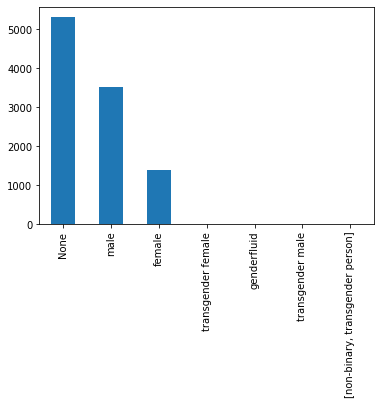

In [18]:
quotes['gender'].value_counts().plot.bar()